In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

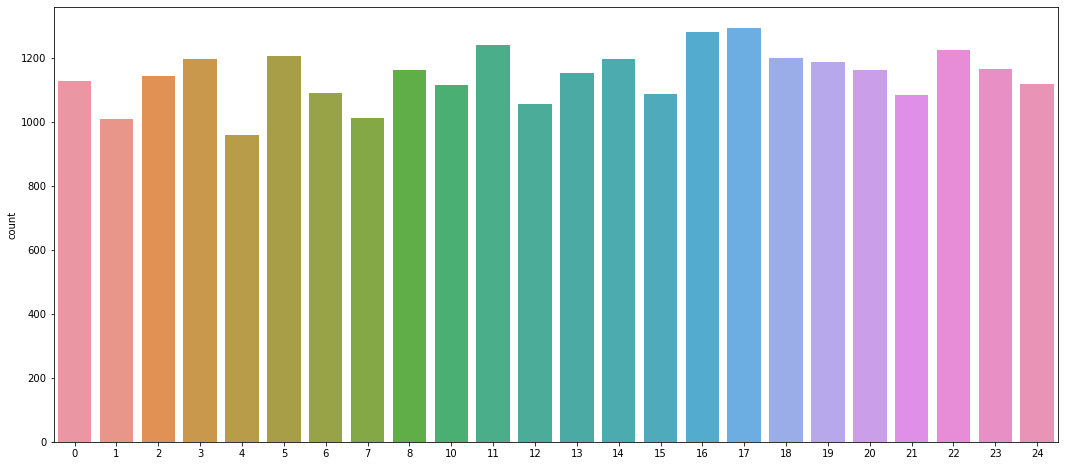

In [6]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [7]:
train.drop('label', axis =1, inplace = True)


In [8]:
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [10]:
labels
#len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


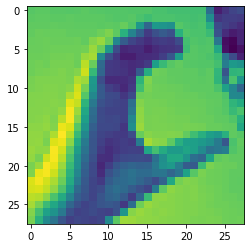

In [11]:
index = 2 
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [12]:
import cv2

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx =10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 100

In [15]:
x_train = x_train/255
x_test = x_test/255


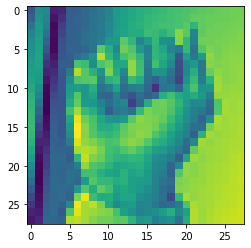

In [16]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64,  kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))


In [18]:

model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics = ['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/100
151/151 [==============================] - 25s 160ms/step - loss: 2.7113 - accuracy: 0.1703 - val_loss: 1.9216 - val_accuracy: 0.3739
Epoch 2/100
151/151 [==============================] - 20s 129ms/step - loss: 1.4721 - accuracy: 0.5082 - val_loss: 0.9615 - val_accuracy: 0.7013
Epoch 3/100
151/151 [==============================] - 14s 93ms/step - loss: 0.8644 - accuracy: 0.7101 - val_loss: 0.6521 - val_accuracy: 0.7712
Epoch 4/100
151/151 [==============================] - 14s 90ms/step - loss: 0.5545 - accuracy: 0.8132 - val_loss: 0.3559 - val_accuracy: 0.8872
Epoch 5/100
151/151 [==============================] - 15s 98ms/step - loss: 0.3649 - accuracy: 0.8770 - val_loss: 0.2459 - val_accuracy: 0.9280
Epoch 6/100
151/151 [==============================] - 15s 97ms/step - loss: 0.2572 - accuracy: 0.9159 - val_loss: 0.1669 - val_accuracy: 0.9534
Epoch 7/100
151/151 [==============================] - 14s 95ms/step - loss: 0.1801 - accuracy: 0.9419 - val_loss: 0.0953 - val_

Epoch 57/100
151/151 [==============================] - 14s 91ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 5.1493e-04 - val_accuracy: 0.9999
Epoch 58/100
151/151 [==============================] - 15s 103ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0044 - val_accuracy: 0.9977
Epoch 59/100
151/151 [==============================] - 15s 98ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 60/100
151/151 [==============================] - 17s 112ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 1.7433e-04 - val_accuracy: 1.0000
Epoch 61/100
151/151 [==============================] - 16s 105ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 1.8603e-04 - val_accuracy: 1.0000
Epoch 62/100
151/151 [==============================] - 14s 91ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 5.8233e-04 - val_accuracy: 0.9998
Epoch 63/100
151/151 [==============================] - 14s 91ms/step - loss: 0.0013 - accuracy: 0.9996 -

In [21]:
model_json = model.to_json()
with open("gesture_model.json",'w')as json_file:
    json_file.write(model_json)

model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


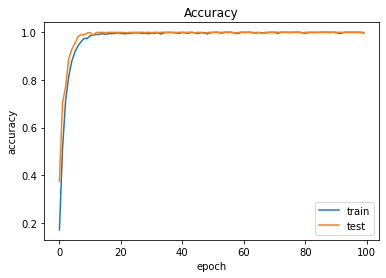

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [23]:
test_labels = test['label']
test.drop('label', axis =1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0],28,28,1)

test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 1s 6ms/step


In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8021472392638037

In [25]:
# checking in real-time webcam

def getLetter(result):
    classLabels = { 0:'A',
                    1:'B',
                    2:'C',
                    3:'D',
                    4:'E',
                    5:'F',
                    6:'G',
                    7:'H',
                    8:'I',
                    9:'K',
                    10:'L',
                    11:'M',
                    12:'N',
                    13:'O',
                    14:'P',
                    15:'Q',
                    16:'R',
                    17:'S',
                    18:'T',
                    19:'U',
                    20:'V',
                    21:'W',
                    22:'X',
                    23:'Y',}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

In [26]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read()
    
    roi = frame[100:400, 320:620]
    cv2.imshow('roi',roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi,(28,28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy,(320,100),(620,400),(255,0,0),5)
    
    roi = roi.reshape(1,28,28,1)
    
    result = model.predict(roi)
    number = np.argmax(result)
    cv2.putText(copy, getLetter(number), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
#     result = str(model.predict(roi,1,verbose=0)[0])
#     cv2.putText(copy, getLetter(result), (300,100), cv2.FONT_HERSHEY_COMPLEX, 2,(0,255,0),2)
    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


In [27]:
        
# cap.release()
# cv2.destroyAllWindows()